# Ford GoBike System Data
## by Hashim Hashim

## Introduction
This data set includes information about individual rides made in a bike sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [85]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Import the dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [86]:
#import the dataset
go_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
go_bike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [87]:
go_bike.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
89366,785,2019-02-16 15:35:19.7480,2019-02-16 15:48:25.0450,356.0,Valencia St at Clinton Park,37.769188,-122.422285,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,6464,Subscriber,1987.0,Male,No
183221,294,2019-02-01 06:31:29.1370,2019-02-01 06:36:23.2180,200.0,2nd Ave at E 18th St,37.800214,-122.253810,163.0,Lake Merritt BART Station,37.797320,-122.265320,4872,Subscriber,1987.0,Female,No
57418,711,2019-02-21 08:14:45.4710,2019-02-21 08:26:36.9070,70.0,Central Ave at Fell St,37.773311,-122.444293,133.0,Valencia St at 22nd St,37.755213,-122.420975,6166,Subscriber,1992.0,Male,No
74988,119,2019-02-19 09:36:32.2200,2019-02-19 09:38:31.7840,134.0,Valencia St at 24th St,37.752428,-122.420628,133.0,Valencia St at 22nd St,37.755213,-122.420975,6308,Subscriber,1967.0,Male,Yes
24234,175,2019-02-25 18:39:47.7590,2019-02-25 18:42:43.0350,132.0,24th St at Chattanooga St,37.751819,-122.426614,131.0,22nd St at Dolores St,37.755000,-122.425728,4658,Subscriber,1996.0,Male,No
150889,1899,2019-02-06 17:21:11.9740,2019-02-06 17:52:51.0890,92.0,Mission Bay Kids Park,37.772301,-122.393028,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,1514,Subscriber,1986.0,Female,No
73224,610,2019-02-19 14:24:11.5470,2019-02-19 14:34:22.2840,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,5501,Subscriber,1995.0,Male,Yes
160699,327,2019-02-05 16:45:24.9290,2019-02-05 16:50:52.8770,19.0,Post St at Kearny St,37.788975,-122.403452,343.0,Bryant St at 2nd St,37.783172,-122.393572,4960,Subscriber,1974.0,Female,No
118654,474,2019-02-11 18:39:06.4380,2019-02-11 18:47:01.2270,312.0,San Jose Diridon Station,37.329732,-121.901782,280.0,San Fernando St at 7th St,37.337122,-121.883215,3116,Subscriber,1986.0,Male,No
45874,605,2019-02-22 10:58:42.3060,2019-02-22 11:08:47.5690,80.0,Townsend St at 5th St,37.775235,-122.397437,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6470,Subscriber,1992.0,Male,No


In [88]:
#check the structure of data
go_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [89]:
#checking the shape of data
go_bike.shape

(183412, 16)

In [90]:
#checking the number of duplicated entries
sum(go_bike.duplicated())

0

In [91]:
#checking the sum of nulls values
go_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Data Cleaning

In [92]:
# make a copy of the dataset for cleaning
go_bike_copy = go_bike.copy()

In [93]:
#remove unwanted columns and the null values
go_bike_copy.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis=1,inplace=True)

In [94]:
go_bike_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

In [95]:
#drop NaNs
go_bike_copy.dropna(inplace=True)

In [96]:
go_bike_copy.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [97]:
go_bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   end_station_id           174952 non-null  float64
 6   end_station_name         174952 non-null  object 
 7   bike_id                  174952 non-null  int64  
 8   user_type                174952 non-null  object 
 9   member_birth_year        174952 non-null  float64
 10  member_gender            174952 non-null  object 
 11  bike_share_for_all_trip  174952 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 17.4+ MB


In [98]:
#correcting datatypes using dictionary and astype
data_types_dict={'start_time':'datetime64',
                'end_time': 'datetime64',
                'start_station_id':'object',
                'end_station_id':'object',
                'bike_id':'object',
                'user_type':'category',
                'bike_share_for_all_trip':'category'}
go_bike_copy = go_bike_copy.astype(data_types_dict)

In [99]:
go_bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  category      
dtypes: category(2), 

In [100]:
#descriptive stats for numeric variables
print(go_bike_copy.describe())

        duration_sec  member_birth_year
count  174952.000000      174952.000000
mean      704.002744        1984.803135
std      1642.204905          10.118731
min        61.000000        1878.000000
25%       323.000000        1980.000000
50%       510.000000        1987.000000
75%       789.000000        1992.000000
max     84548.000000        2001.000000


In [101]:
go_bike_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

In [102]:
go_bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  category      
dtypes: category(2), 

In [103]:
go_bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  category      
dtypes: category(2), 

### What is the structure of your dataset?

 The dataset has 174,952 rows and 12 columns(duration_sec,start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type,
 member_birth_year, member_gender, bike_share_for_all_trip) after cleaning the dataset.
### What is/are the main feature(s) of interest in your dataset?

Main features of interest in this dataset are start time, duration and user type so we could analyze the trip duration and discover insights.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Other important features include member gender and end time.

## Univariate Exploration

I'll start by investigating the distributions of individual variables to check for unusual points and outliers.
 


In [104]:
go_bike_copy.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

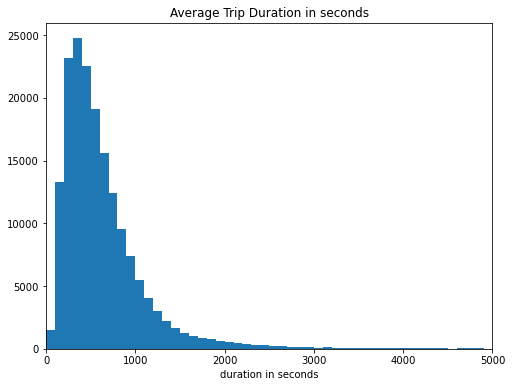

In [105]:
#plot a histogram on trip duration in seconds
plt.figure(figsize=(8,6))
bins = np.arange(0,go_bike_copy['duration_sec'].max()+100,100)
plt.hist(data = go_bike_copy, x='duration_sec', bins=bins);
plt.xlim(0,5000)
plt.title('Average Trip Duration in seconds')
plt.xlabel('duration in seconds');

We can observe that the average trip durations is right skewed but in order to view this data correctly we will need to perform  transformation in logarthimic scale.

In [106]:
#transform the describe() to a scale of log10
np.log10(go_bike_copy['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

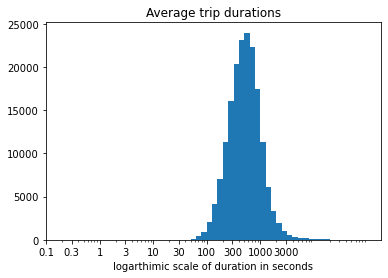

In [107]:
#axis transformation
#bin size
#get the ticks for bins 
bins = 10 ** np.arange(0, 5+0.1, 0.1)

#generate the x-ticks 
ticks = [0.1,0.3,1,3,10,30,100,300,1000,3000]
#convert ticks to string values
labels = ['{}'.format(v) for v in ticks]

#plot histogram
plt.hist(data=go_bike_copy, x='duration_sec', bins=bins);

plt.xscale('log')
plt.title('Average trip durations')
plt.xlabel('logarthimic scale of duration in seconds')
#apply x-ticks
plt.xticks(ticks,labels);

In [108]:
#create a minute column
go_bike_copy['duration_min'] = go_bike_copy['duration_sec']/60
go_bike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,29.883333


In [109]:
np.log10(go_bike_copy['duration_min'].describe())

count    5.242919
mean     1.069423
std      1.437276
min      0.007179
25%      0.731051
50%      0.929419
75%      1.118926
max      3.148952
Name: duration_min, dtype: float64

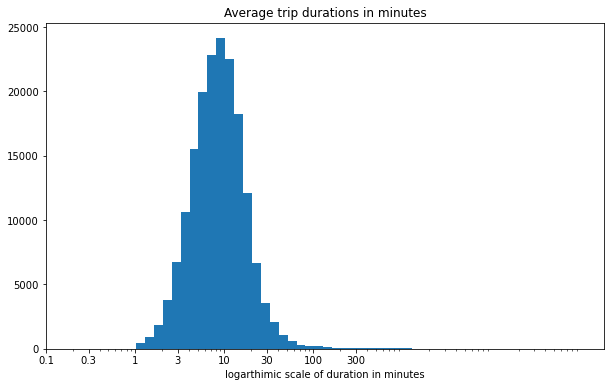

In [110]:
plt.figure(figsize=(10,6))
#get the ticks for bins 
bins = 10 ** np.arange(0.01, 5+0.1, 0.1)

#generate the x-ticks 
ticks = [0.1,0.3,1,3,10,30,100,300]
#convert ticks to string values
labels = ['{}'.format(v) for v in ticks]

#plot histogram
plt.hist(data=go_bike_copy, x='duration_min', bins=bins);

plt.xscale('log')
plt.title('Average trip durations in minutes')
plt.xlabel('logarthimic scale of duration in minutes')
#apply x-ticks
plt.xticks(ticks,labels);

The plot closely follows a normal distribution and majority of the bikes are rented for about 10 minutes.

In [111]:
#get the day names of the dateTime index
go_bike_copy['day_of_week']=go_bike_copy['start_time'].dt.day_name()
#convert day of week column to category
order_var = pd.api.types.CategoricalDtype(ordered=True,categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])
go_bike_copy['day_of_week'] = go_bike_copy['day_of_week'].astype(order_var)

In [112]:
go_bike_copy.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [113]:
#list of days in order
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

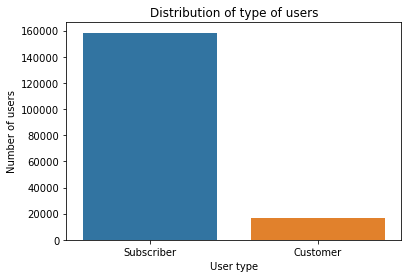

In [114]:
#distribution of type of users
sb.countplot(data=go_bike_copy,x='user_type', order=go_bike_copy['user_type'].value_counts().index)
plt.title ('Distribution of type of users')
plt.xlabel('User type')
plt.ylabel('Number of users');

The distribution shows that most users of the bicyle rental company are subscribers. 

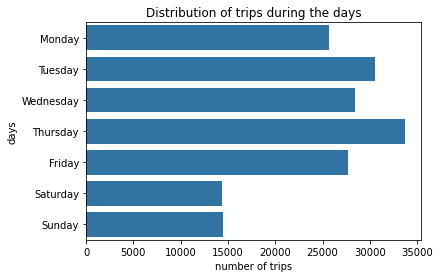

In [115]:
#plot the the number trips per day
base_color = sb.color_palette()[0]
sb.countplot(data=go_bike_copy, y='day_of_week', color=base_color)
plt.title('Distribution of trips during the days')
plt.xlabel('number of trips')
plt.ylabel('days');

The chart shows that the trips were mostly made during the weekdays to thursday being the day with the most trips then the number decreases towards the weekend.

In [116]:
#get the hours from the start time
go_bike_copy['hours']=go_bike_copy['start_time'].dt.hour

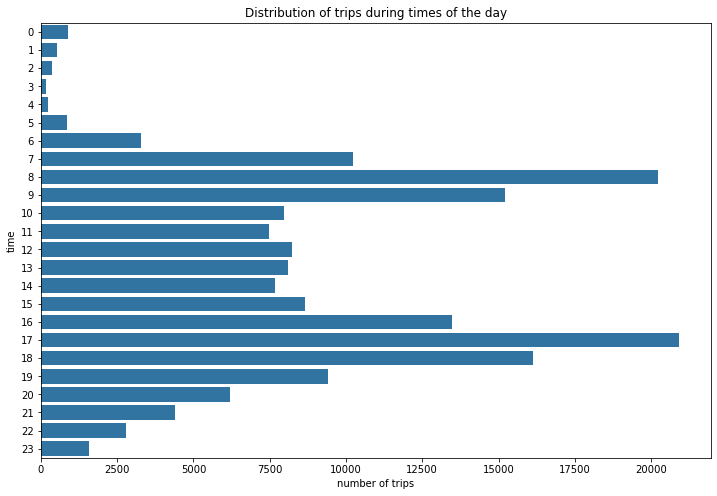

In [117]:
#plotting times of the day of renting
plt.figure(figsize=[12,8])
base_color = sb.color_palette()[0]
sb.countplot(data=go_bike_copy, y='hours', color=base_color)
plt.title('Distribution of trips during times of the day')
plt.xlabel('number of trips')
plt.ylabel('time');

According to the chart, maximum number of trips at the bay area were made at 800 am and at 1700 hrs. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Distribution of trips in seconds took on a large range of values, so I used the a log transform on the x-axis and  changed the variable into minutes. Under the transformation, the distribution became a normal distribution with the average trip duration at below 25000 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

While plotting the hours and days variable, I extracted the variables from the variable start time using datetime object so I could plot the distribution of trips according to the days and hours

## Bivariate Exploration

In this section, I will explore bivariate plots for more insights on trip duration and member types.

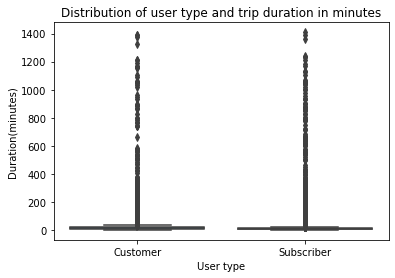

In [118]:
sb.boxplot(data=go_bike_copy, x = 'user_type', y='duration_min')
plt.title('Distribution of user type and trip duration in minutes')
plt.xlabel('User type')
plt.ylabel('Duration(minutes)');

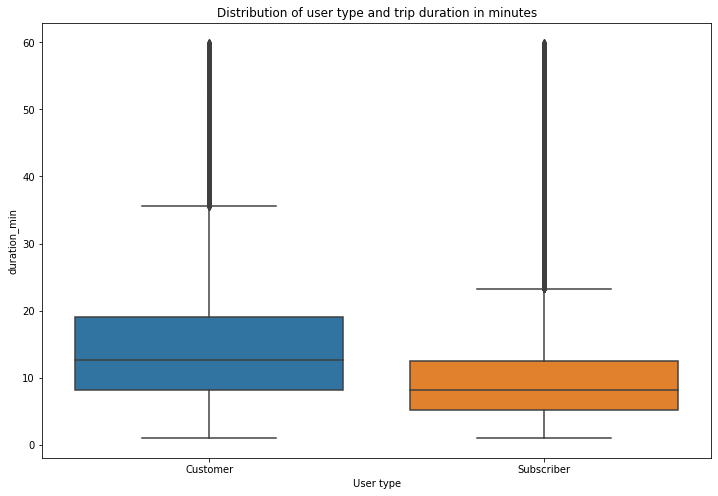

In [119]:
#plotting a subset of the data 
plt.figure(figsize = [12,8])
df=go_bike_copy.query('duration_min <= 60')
sb.boxplot(data=df, x = 'user_type', y='duration_min')
plt.title('Distribution of user type and trip duration in minutes')
plt.xlabel('User type')
plt.show();


The customers have a higher median than the subscribers. Customers took longer rides and than their counterparts subscribers who had lessser time riding because they did on a regular time.

In [120]:
go_bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  category      
 12  duration_min    

In [121]:
#plotting on bike use per day
def myCountPlot(go_bike_copy,xVar,hueVar,palette=['g','maroon'],order=None):
    # set plot dimensions
    plt.figure(figsize=[14,6])
    #plot
    sb.countplot(data=go_bike_copy, x=xVar,hue=hueVar,edgecolor='black',palette=palette, order=order);
    
    #clean up variable names AFTER Plotting
    xVar=xVar.replace("_"," ") # replace _ with a space
    hueVar=hueVar.replace("_"," ")
    
    #Add title and format it
    plt.title(f'''Distribution of {xVar} by {hueVar}'''.title(), fontsize=14, weight="bold")
    
    #Add x label and format it
    plt.xlabel(xVar.title(),fontsize=10,weight="bold")
    
    #Add y label and format it
    plt.ylabel('Frequency'.title(), fontsize=10, weight="bold")

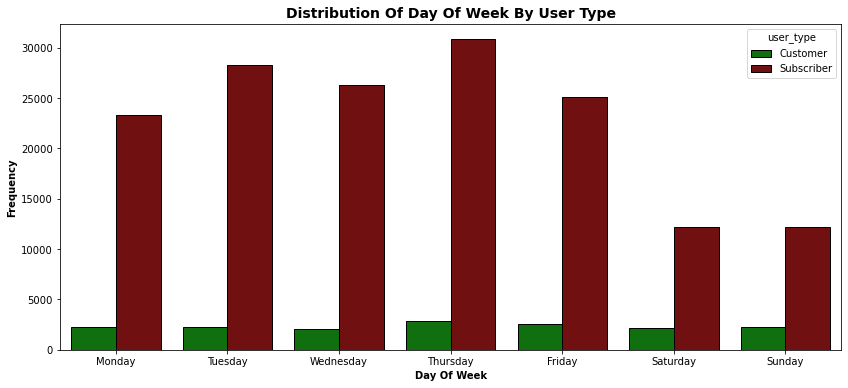

In [122]:
#plotting Bike Usage in each day
myCountPlot(go_bike_copy, 'day_of_week', 'user_type', order=day_order)

Subscribers tend to ride and rent bicyles the most during weekdays and decreases during weekends as we have seen earlier while the number of customers tend to increase by a small margin towards the weekends.Also the customers  usage is under 5000 trips during during the whole week.

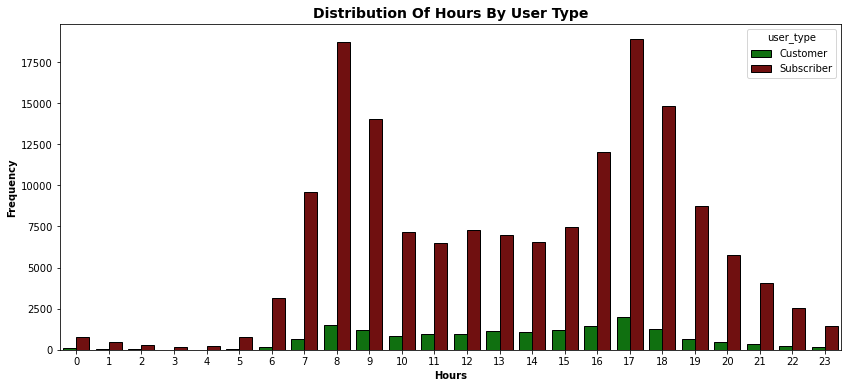

In [123]:
#plot of customers and subscribers against time
myCountPlot(go_bike_copy, 'hours', 'user_type')

Most Customers rented the services from 8 am to 1800 at evening while subscribers rented during the peak hours at 8 in the morning and 1700 hrs at evening.

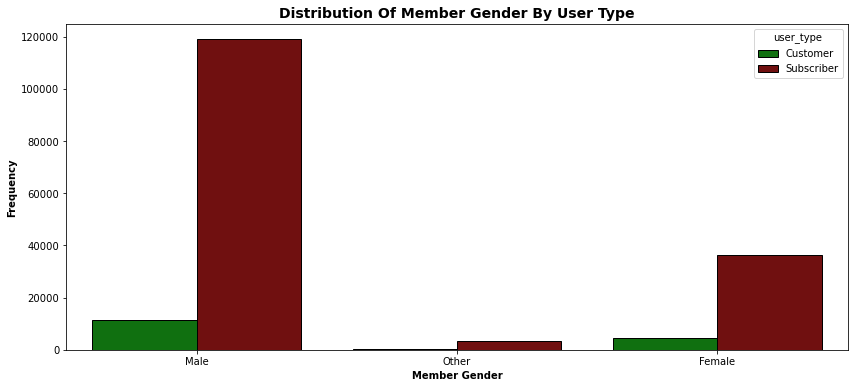

In [124]:
#plotting distribution of gender
myCountPlot(go_bike_copy,'member_gender','user_type')

There are more males than females who rent bicycles at the bay area.

In [125]:
go_bike_copy.member_gender.describe()

count     174952
unique         3
top         Male
freq      130500
Name: member_gender, dtype: object

In [126]:
go_bike_copy.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

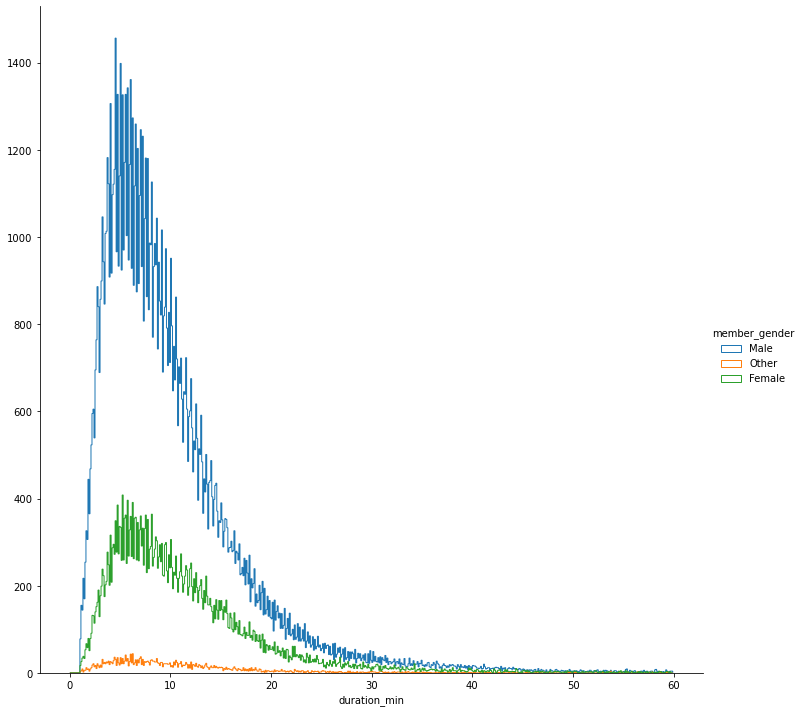

In [127]:
#a line plot for types of gender durations
bin_edges = np.arange(0, 60,0.1)
g = sb.FacetGrid(data = go_bike_copy, hue = 'member_gender', height = 10)
g.map(plt.hist, "duration_min", bins = bin_edges, histtype = 'step')
g.add_legend();

The male gender had a longer duration for riding bicycles than than the females

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Subscribers who have the highest number of trips during the days took shorter time renting the bikes during the weekdays, while customers took longer time cycling and their trips were inclined more towards the weekend

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There are more males than female who rent and ride bikes at the Francisco bay area.

## Multivariate Exploration

Here we will plot all three variables of duration days and type of users.

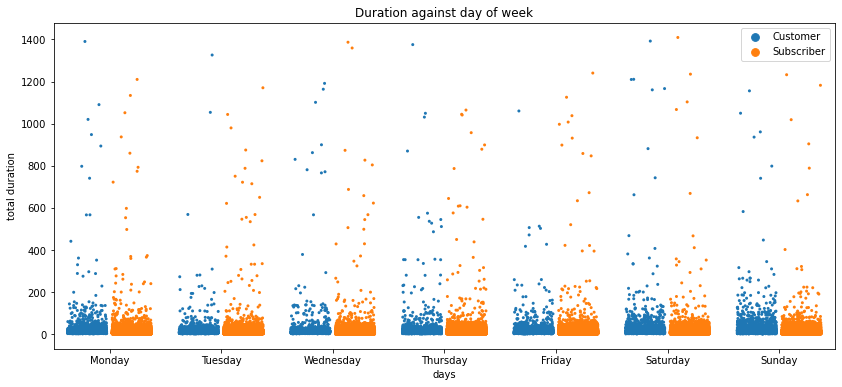

In [132]:
#set plot dimensions
plt.figure(figsize=[14,6])
#plotting all three duration, days and type of user
g=sb.stripplot(data=go_bike_copy, x='day_of_week', y='duration_min', hue= 'user_type', order=day_order, size=3,
              jitter=0.35, dodge=True)
plt.title('Duration against day of week')
plt.ylabel('total duration')
plt.xlabel('days')
plt.legend();

We can observe that subscribers took more trips than customers but customers took longer rides than the subscribers.

In [129]:
go_bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  category      
 12  duration_min    

C:\Users\Haashim\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


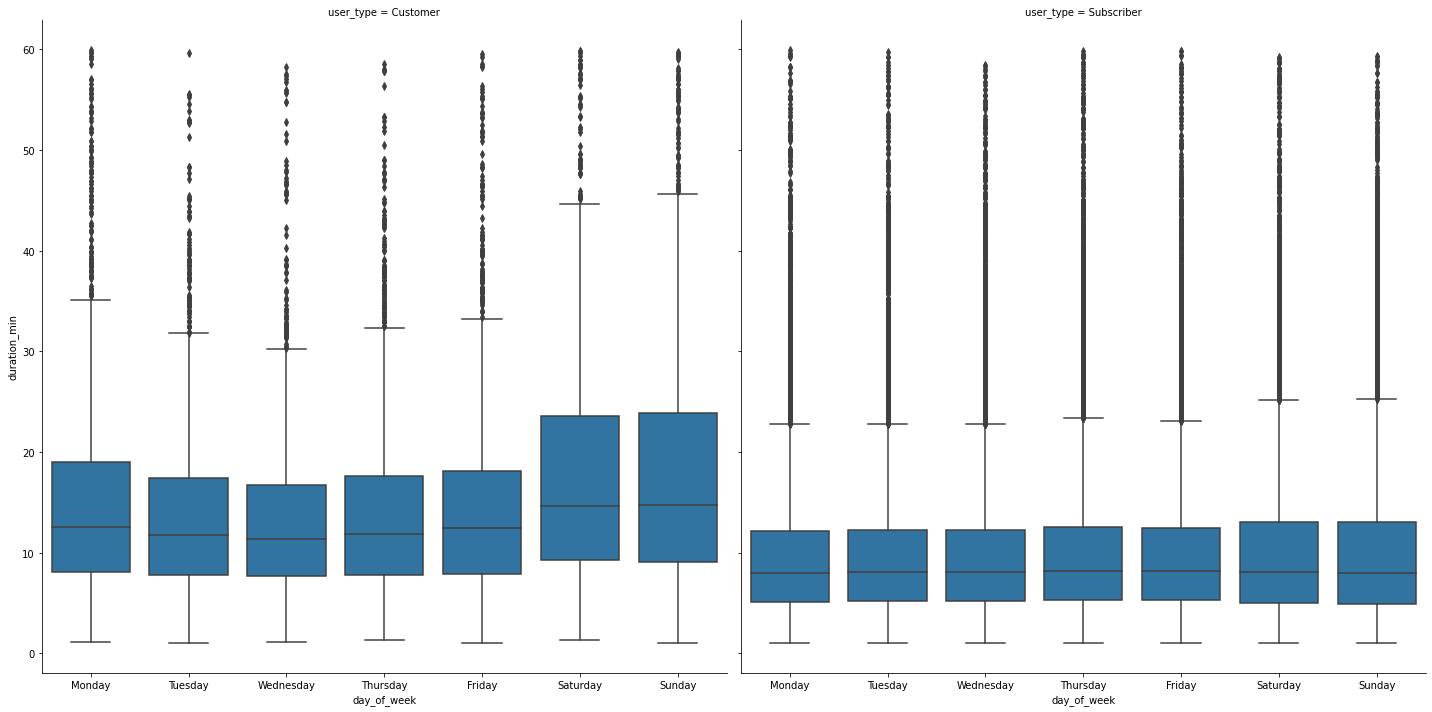

In [130]:
#plotting duration against days of the week
g = sb.FacetGrid(data = df, col = 'user_type', height = 10,
                margin_titles=True)
g.map(sb.boxplot, 'day_of_week', 'duration_min');


This boxplot confirms customers took more time renting bikes than subscribers and the time increases during saturdays and sundays.

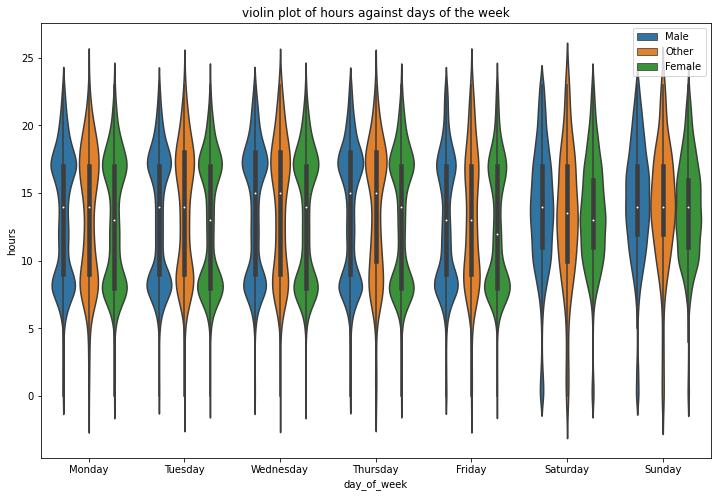

In [131]:
plt.figure(figsize=(12,8))
sb.violinplot(data=go_bike_copy, x='day_of_week', y='hours',hue='member_gender')
plt.legend()
plt.title('violin plot of hours against days of the week');

The violin plot shows the relationship of member gender, hours and days of the week. The mean number of males is higher than females during the whole week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Subscribers have shown to take the most number of trips during the weekdays while cutomers took more trips towards the weekends.

### Were there any interesting or surprising interactions between features?

There is a relationship between the number of males who rent the bikes and the duration of the trips. Male gender is observed to take longer trip duration than females who rent bikes.

## Conclusions

We could infer how the type of users use the bicycle service based on the hours and days of the week. We have analyzed this usage based on these variables  and we looked at the distribution of duration in minutes, hours and days of the week to find various insights of subscribers and customers and their durations.
Some of the insights include:
- Use of  bicycle service for subscribers is high on weekdays and low and weekends.
- Most of the subscribers use bicycle service at 0800 in the morning and at 1700hrs in the evening for the subscribers.
- Subscribers usage shows stability during the whole week
- Customers used the service mostly at noon and took longer durations than subscribers due to their flexible time.



